# REGRESI LINEAR

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud

import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt

init_notebook_mode(connected=True) 

import warnings
warnings.filterwarnings('ignore')

import csv
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
data = pd.read_csv("computer_hardwere.csv",sep=",")
print(data)


    vendor name     Model Name  MYCT  MMIN   MMAX  CACH  CHMIN  CHMAX  PRP  \
0       adviser          32/60   125   256   6000   256     16    128  198   
1        amdahl         470v/7    29  8000  32000    32      8     32  269   
2        amdahl        470v/7a    29  8000  32000    32      8     32  220   
3        amdahl        470v/7b    29  8000  32000    32      8     32  172   
4        amdahl        470v/7c    29  8000  16000    32      8     16  132   
..          ...            ...   ...   ...    ...   ...    ...    ...  ...   
204      sperry           80/8   124  1000   8000     0      1      8   42   
205      sperry  90/80-model-3    98  1000   8000    32      2      8   46   
206      sratus             32   125  2000   8000     0      2     14   52   
207        wang         vs-100   480   512   8000    32      0      0   67   
208        wang          vs-90   480  1000   4000     0      0      0   45   

     ERP  
0    199  
1    253  
2    253  
3    253  
4    132

In [6]:
data_x =['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']
X = data[data_x]
Y = data.PRP

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor name    209 non-null object
Model Name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [78]:
data.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


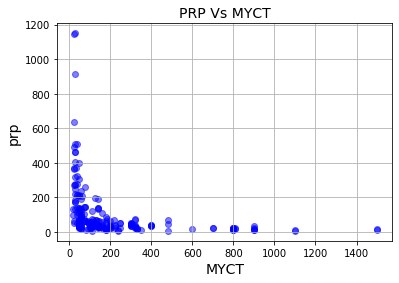

In [8]:
plt.scatter( data['MYCT'],data['PRP'], color='blue',alpha=.5)
plt.title('PRP Vs MYCT', fontsize=14)
plt.xlabel('MYCT', fontsize=14)
plt.ylabel('prp', fontsize=14)
plt.grid(True)
plt.show()

Berdasarkan hasil sebaran data prp semakin meningkat saat myct bernilai rendah yang mengindikasikan terdapat korelasi disimpulkan dengan MYCT

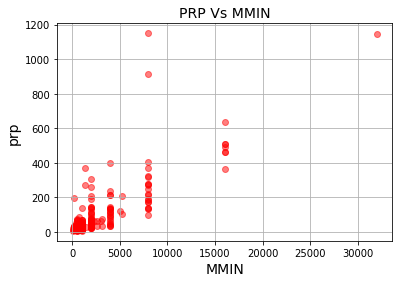

In [10]:
plt.scatter(data['MMIN'],data['PRP'], color='red',alpha=.5)
plt.title('PRP Vs MMIN', fontsize=14)
plt.xlabel('MMIN', fontsize=14)
plt.ylabel('prp', fontsize=14)
plt.grid(True)
plt.show()

Berdasarkan hasil sebaran data terdapat kecenderungan korelasi positif 

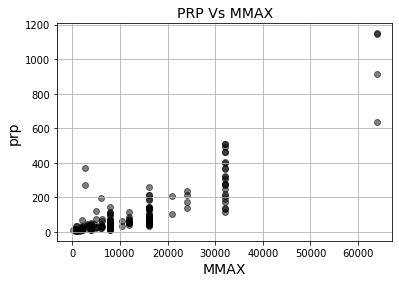

In [9]:
plt.scatter( data['MMAX'],data['PRP'], color='black',alpha=.5)
plt.title('PRP Vs MMAX', fontsize=14)
plt.xlabel('MMAX', fontsize=14)
plt.ylabel('prp', fontsize=14)
plt.grid(True)
plt.show()

Berdasarkan hasil sebaran data terdapat kecenderungan korelasi positif 

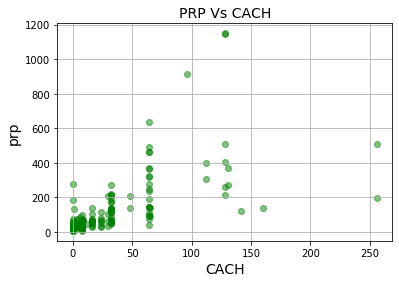

In [21]:
plt.scatter( data['CACH'],data['PRP'], color='green',alpha=.5)
plt.title('PRP Vs CACH', fontsize=14)
plt.xlabel('CACH', fontsize=14)
plt.ylabel('prp', fontsize=14)
plt.grid(True)
plt.show()

Berdasarkan hasil sebaran data terdapat kecenderungan korelasi positif 

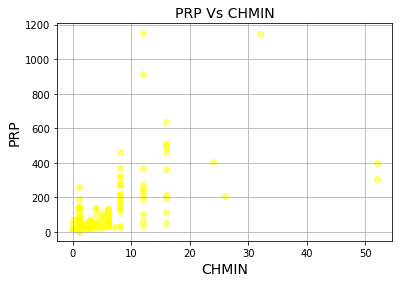

In [22]:
plt.scatter( data['CHMIN'],data['PRP'], color='yellow',alpha=.5)
plt.title('PRP Vs CHMIN', fontsize=14)
plt.xlabel('CHMIN', fontsize=14)
plt.ylabel('PRP', fontsize=14)
plt.grid(True)
plt.show()

Berdasarkan hasil sebaran data terdapat kecenderungan korelasi positif 

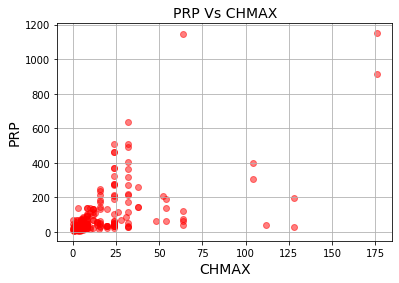

In [23]:
plt.scatter(data['CHMAX'],data['PRP'], color='red',alpha=.5)
plt.title('PRP Vs CHMAX', fontsize=14)
plt.xlabel('CHMAX', fontsize=14)
plt.ylabel('PRP', fontsize=14)
plt.grid(True)
plt.show()

Berdasarkan hasil sebaran data terdapat kecenderungan korelasi positif 

# Estimasi Model Regresi

RMSE =  56.53513460262522
R Square: 0.8624393939262729
intercept: -64.85461147016818
slope: [ 0.05658504  0.01592189  0.006252    0.51810482 -0.57507068  1.46969039]


,Coefficient
MYCT,0.056585
MMIN,0.015922
MMAX,0.006252
CACH,0.518105
CHMIN,-0.575071
CHMAX,1.469690


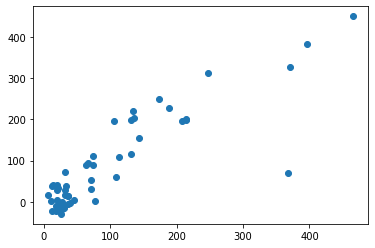

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)
model =LinearRegression()

model.fit(X_train,y_train)

y_pred=model.predict( X_test)
plt.scatter(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('RMSE = ',RMSE)
r_sq = model.score(X, Y)
intercept = model.intercept_
coef = model.coef_
print('R Square:', r_sq)
print('intercept:', intercept)
print('slope:',coef)
pd.DataFrame(data=model.coef_, index=X.columns, columns=['Coefficient'])

# Hasil Regresi

1. Berdasarkan hasil regresi didapatkan
   CPU Performance = -64,85 + 0.05658504 MYCT + 0.01592189 MMIN +  0.006252 MMAX + 0.51810482 CACH - 0.57507068 CHMIN +  1.46969039 CHMAX
        - Saat X1-X6 bernilai 0 maka cpu peformance akan menurun dengan nilai 64,85
        -  Saat variabel MYCT sebesar 0.05658504 berarti apabila variabel MYCT mengalami peningkatan sebesar 1 satuan maka akan meningkatkan CPU Performance sebesar 0.05658504 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan. 
        - Saat variabel MMIN sebesar 0.01592189 berarti apabila variabel MMIN mengalami peningkatan sebesar 1 satuan maka akan meningkatkan CPU Performance sebesar 0.01592189 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.
        - Saat variabel MMAX sebesar  0.006252 berarti apabila variabel MMAX mengalami peningkatan sebesar 1 satuan maka akan meningkatkan CPU Performance sebesar  0.006252 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.
        - Saat variabel CACH sebesar 0.5181048 berarti apabila variabel CACH mengalami peningkatan sebesar 1 satuan maka akan meningkatkan CPU Performance sebesar 0.5181048 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.
        - Saat variabel CHMIN sebesar -0.57507068 berarti apabila variabel CHMIN mengalami penurunan sebesar 1 satuan maka akan menurunkan CPU Performance sebesar -0.57507068 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.
        - Saat variabel CHMAX sebesar 1.46969039 berarti apabila variabel CHMAX mengalami peningkatan sebesar 1 satuan maka akan meningkatkan CPU Performance sebesar 1.46969039 satuan dengan asumsi bahwa variabel lainnya dianggap nol atau konstan.

